# Jacen's notebook (for now)
## Discovering the listening patterns of users from different countries
Basically I will just take the top 50 songs from each country and get the average value of the audio features for all the songs. Since one of the broad aims of our project is to discover the listening patterns of Spotify users, I thought it would be interesting to take a geographical approach.<br><br> What is helpful about the audio features provided by the Spotify API is that they have been quantified, which means it is easy to just get the mean value of the audio features for all the top 50 songs in a country. Then I can get a representative sample of what kind of songs users in that country like to listen to.<br><br> One thing I wish to do later is try to weigh the audio features by the popularity of the song to make it more reflective of the country's users' tastes. But for now I will just get the mean for each country and then we can do some analysis on that.

In [5]:
# I had to make my own dictionary of each country's daily top 50 playlists
# because I can't just scrape the data from the website or using the API
# I will put this in a .py file later and import it into this notebook

top_50_playlists = [
    {'country' : 'Argentina', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMMy2roB9myp?si=d47713136c474c53'}, 
    {'country' : 'Australia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJPcfkRz0wJ0?si=73bda9551f9345ca'},
    {'country' : 'Austria', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKNHh6NIXu36?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Belarus', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbIYfjSLbWr4V?si=d4b611bdb7454131'},
    {'country' : 'Belgium', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJNSeeHswcKB?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Bolivia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJqfMFK4d691?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Brazil', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMXbN3EUUhlg?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Bulgaria', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbNfM2w2mq1B8?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Canada', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKj23U1GF4IR?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Chile', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbL0GavIqMTeb?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Colombia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbOa2lmxNORXQ?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Costa Rica', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMZAjGMynsQX?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Czech Republic', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbIP3c3fqVrJY?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Denmark', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbL3J0k32lWnN?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Dominican Republic', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKAbrMR8uuf7?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Ecuador', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJlM6nvL1nD1?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Egypt', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJ6IpvItkve3?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'El Salvador', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLxoIml4MYkT?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Estonia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLesry2Qw2xS?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Finland', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMxcczTSoGwZ?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'France', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbIPWwFssbupI?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Germany', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJiZcmkrIHGU?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Greece', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJqfMFK4d691?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Guatemala', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLy5tBFyQvd4?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Honduras', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJp9wcIM9Eo5?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Hong Kong', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLwpL8TjsxOG?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Hungary', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbNHwMxAkvmF8?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Iceland', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKMzVsSGQ49S?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'India', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLZ52XmnySJg?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Indonesia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbObFQZ3JLcXt?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Ireland', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKM896FDX8L1?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Israel', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJ6IpvItkve3?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Italy', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbIQnj7RRhdSX?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Japan', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKXQ4mDTEBXq?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Kazakhstan', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbM472oKPNKzS?si=1d35f5f2f10247ac'},
    {'country' : 'Latvia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJWuzDrTxbKS?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Lithuania', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMx56Rdq5lwc?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Luxembourg', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKGcyg6TFGx6?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Malaysia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJlfUljuZExa?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Mexico', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbO3qyFxbkOE1?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Morocco', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJU9eQpX8gPT?si=9cc564128c8740bb'},
    {'country' : 'Netherlands', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKCF6dqVpDkS?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'New Zealand', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbM8SIrkERIYl?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Nicaragua', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbISk8kxnzfCq?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Nigeria', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKY7jLzlJ11V?si=af63b882ab484c97'},
    {'country' : 'Norway', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJvfa0Yxg7E7?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Pakistan', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJkgIdfsJyTw?si=1a04c48180a248f1'},
    {'country' : 'Panama', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKypXHVwk1f0?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Paraguay', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbNOUPGj7tW6T?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Peru', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJfdy5b0KP7W?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Philippines', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbNBz9cRCSFkY?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Poland', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbN6itCcaL3Tt?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Portugal', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKyJS56d1pgi?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Romania', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbNZbJ6TZelCq?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Saudi Arabia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLrQBcXqUtaC?si=5834de01ea1841f2'},
    {'country' : 'Singapore', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbK4gjvS1FjPY?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Slovakia', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKIVTPX9a2Sb?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'South Africa', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMH2jvi6jvjk?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'South Korea', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbNxXF4SkHj9F?si=696c7ba21cb74699'},
    {'country' : 'Spain', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbNFJfN1Vw8d9?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Sweden', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLoATJ81JYXz?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Switzerland', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbJiyhoAPEfMK?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Taiwan', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMnZEatlMSiu?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Thailand', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMnz8KIWsvf9?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Turkey', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbIVYVBNw9D5K?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Ukraine', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbKkidEfWYRuD?si=aa038fe2c2104c7f'},
    {'country' : 'United Arab Emirates', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbM4UZuIrvHvA?si=67ddedd2245644d6'},
    {'country' : 'United Kingdom', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLnolsZ8PSNw?si=c5fac239cb7b4619'},
    {'country' : 'United States', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLRQDuF5jeBp?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Uruguay', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbMJJi3wgRbAy?si=3b1b0b6b1b1b4c8a'},
    {'country' : 'Venezuela', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbNLrliB10ZnX?si=23ef2b0d263b455d'},
    {'country' : 'Vietnam', 'url' : 'https://open.spotify.com/playlist/37i9dQZEVXbLdGSmz6xilI?si=ea2772c536e74935'}
] 

In [6]:
# first I need to import the necessary packages and define a function

import requests
import pandas as pd
# reminder to self not to add the access token to github!!!
access_token = 'BQC8ALsLkyCnVg5hJBT4sPMnPZpGRCu9mmY2ngAooN7TVDnTVpT8PM8VktVqZjo-6j6uSTRv_sZXhY-0RzwihssIm5fAVAxrq2pqAbTYp9wbSyA6lTg50JFn0uzkV9kOoJ1R5_hNbGSWtHNCNpM0Az6VsoPTO9UXQTxhT3Xyz-r-ptx2cA'
Authorization = 'Bearer ' + access_token

def get_features(playlist):
    '''
    playlist: dictionary with keys 'country' and 'url'
    returns: dataframe with audio features for each track in the playlist
    '''
    playlist_id = playlist['url'].strip('https://open.spotify.com/playlist/').split('?')[0]
    playlist_tracks_url = 'https://api.spotify.com/v1/playlists/' + playlist_id +'/tracks'
    tracks = requests.get(playlist_tracks_url, headers={'Authorization': Authorization})
    # this is so I know what error I am getting if the code doesn't work for some reason
    if tracks.status_code != 200:
        raise Exception('Error: ' + tracks.text)
    else:
        track_uris = [track['track']['uri'].replace('spotify:track:','') for track in tracks.json()['items']]
        ids = '%2C'.join(track_uris)
        track_names = [track['track']['name'] for track in tracks.json()['items']]
        audio_features_url = 'https://api.spotify.com/v1/audio-features?ids=' + ids
        response = requests.get(audio_features_url, headers={'ids': ids, 'Authorization': Authorization})
        df = pd.DataFrame(data = response.json()['audio_features'], index = track_names)
        return df

In [7]:
# first I want to see what the function returns for one playlist
df_argentina = get_features(top_50_playlists[0])
df_argentina

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
En La Intimidad | CROSSOVER #1,0.804,0.555,1,-4.991,1,0.1070,0.09240,0.000000,0.0699,0.640,89.946,audio_features,7w7BrPbOjF5OxChs2dxFve,spotify:track:7w7BrPbOjF5OxChs2dxFve,https://api.spotify.com/v1/tracks/7w7BrPbOjF5O...,https://api.spotify.com/v1/audio-analysis/7w7B...,172118,4
M.A (Mejores Amigos),0.746,0.729,7,-5.855,1,0.0630,0.29800,0.000000,0.2710,0.755,87.971,audio_features,1eIDsKCLwZF6CJK8pOgHX5,spotify:track:1eIDsKCLwZF6CJK8pOgHX5,https://api.spotify.com/v1/tracks/1eIDsKCLwZF6...,https://api.spotify.com/v1/audio-analysis/1eID...,158310,4
TQG,0.720,0.630,4,-3.547,0,0.2770,0.67300,0.000000,0.0936,0.607,179.974,audio_features,0DWdj2oZMBFSzRsi2Cvfzf,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,https://api.spotify.com/v1/tracks/0DWdj2oZMBFS...,https://api.spotify.com/v1/audio-analysis/0DWd...,199440,4
Ya No Vuelvas (Versión Cuarteto),0.736,0.900,1,-4.575,1,0.0825,0.22400,0.000000,0.3750,0.562,149.947,audio_features,6jRZ33ifS5VOTMwmPxhPhN,spotify:track:6jRZ33ifS5VOTMwmPxhPhN,https://api.spotify.com/v1/tracks/6jRZ33ifS5VO...,https://api.spotify.com/v1/audio-analysis/6jRZ...,204000,4
MERCHO,0.838,0.790,6,-1.602,0,0.1080,0.43100,0.000003,0.1840,0.962,92.927,audio_features,1DxEbt6OSbrkRthk6pjZue,spotify:track:1DxEbt6OSbrkRthk6pjZue,https://api.spotify.com/v1/tracks/1DxEbt6OSbrk...,https://api.spotify.com/v1/audio-analysis/1DxE...,161452,4
Cupido,0.913,0.584,9,-5.263,1,0.2230,0.52100,0.000054,0.3070,0.627,119.873,audio_features,04ndZkbKGthTgYSv3xS7en,spotify:track:04ndZkbKGthTgYSv3xS7en,https://api.spotify.com/v1/tracks/04ndZkbKGthT...,https://api.spotify.com/v1/audio-analysis/04nd...,174370,4
Rara Vez,0.838,0.708,5,-4.668,0,0.1660,0.17600,0.000000,0.3430,0.960,119.984,audio_features,7MVIfkyzuUmQ716j8U7yGR,spotify:track:7MVIfkyzuUmQ716j8U7yGR,https://api.spotify.com/v1/tracks/7MVIfkyzuUmQ...,https://api.spotify.com/v1/audio-analysis/7MVI...,128677,4
Yandel 150,0.783,0.729,6,-3.549,0,0.0691,0.04920,0.000272,0.1000,0.580,167.968,audio_features,4FAKtPVycI4DxoOHC01YqD,spotify:track:4FAKtPVycI4DxoOHC01YqD,https://api.spotify.com/v1/tracks/4FAKtPVycI4D...,https://api.spotify.com/v1/audio-analysis/4FAK...,216148,4
Pobre Corazón,0.463,0.840,10,-4.781,0,0.0475,0.04450,0.000000,0.4430,0.466,91.038,audio_features,1gpayq8BQ8Z1AZSCHUeZOC,spotify:track:1gpayq8BQ8Z1AZSCHUeZOC,https://api.spotify.com/v1/tracks/1gpayq8BQ8Z1...,https://api.spotify.com/v1/audio-analysis/1gpa...,198931,4
"Arcángel: Bzrp Music Sessions, Vol. 54",0.716,0.780,11,-3.495,0,0.2970,0.55000,0.000000,0.1460,0.786,123.856,audio_features,7cQ0LAxT5HHCLGbxcjaxac,spotify:track:7cQ0LAxT5HHCLGbxcjaxac,https://api.spotify.com/v1/tracks/7cQ0LAxT5HHC...,https://api.spotify.com/v1/audio-analysis/7cQ0...,228387,4


This dataframe shows the audio features of the most 50 popular songs in a country (in this case Argentina). Since we know the audio features of the most popular songs, we could take the mean value of all these audio features and put it into a dataframe. We can use it as a representation of what music the country's users like to listen to.<br><br> Then afterwards we could join all the dataframes together to show what kind of music the users of each country like to listen to.

In [8]:
df_argentina.mean()

/var/folders/c_/lwvsxwd94kv4bvh2zjvgt3rc0000gn/T/ipykernel_829/182284860.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_argentina.mean()


danceability             0.738700
energy                   0.665500
key                      5.780000
loudness                -5.244980
mode                     0.440000
speechiness              0.115564
acousticness             0.237986
instrumentalness         0.003264
liveness                 0.212630
valence                  0.633600
tempo                  112.972900
duration_ms         182502.020000
time_signature           3.960000
dtype: float64

Using the method .mean() on this dataframe returns a panda series with the mean value of each audio feature. We can convert this series into a dataframe and then transpose it so that the audio features are the columns and the mean values are the rows. This will make it easier to join all the dataframes together later.

In [9]:
# getting the mean value of the features for each country's playlist
# and then putting them into a list of dataframes
# to be concatenated into one dataframe
# using list comprehension to make the code more efficient
list_of_dfs = [(get_features(top_50_playlists[i]).mean().rename(top_50_playlists[i]['country']).to_frame().swapaxes('index', 'columns')) for i in range(len(top_50_playlists))]
df_all_audio_features = pd.concat(list_of_dfs)
df_all_audio_features

/var/folders/c_/lwvsxwd94kv4bvh2zjvgt3rc0000gn/T/ipykernel_829/2352057950.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  list_of_dfs = [(get_features(top_50_playlists[i]).mean().rename(top_50_playlists[i]['country']).to_frame().swapaxes('index', 'columns')) for i in range(len(top_50_playlists))]
/var/folders/c_/lwvsxwd94kv4bvh2zjvgt3rc0000gn/T/ipykernel_829/2352057950.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  list_of_dfs = [(get_features(top_50_playlists[i]).mean().rename(top_50_playlists[i]['country']).to_frame().s

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Argentina,0.73870,0.66550,5.78,-5.24498,0.44,0.115564,0.237986,0.003264,0.212630,0.633600,112.97290,182502.02,3.96
Australia,0.65956,0.64192,5.22,-6.50540,0.74,0.082410,0.250339,0.019363,0.163216,0.521600,123.13682,195127.40,3.86
Austria,0.73002,0.69158,4.70,-6.51260,0.46,0.119706,0.235949,0.012272,0.201260,0.583780,126.87928,176379.08,4.00
Belarus,0.64810,0.68016,5.10,-6.91520,0.48,0.131206,0.178967,0.067352,0.219444,0.477620,135.23300,152813.96,3.92
Belgium,0.65772,0.67340,4.36,-6.50024,0.62,0.088458,0.227131,0.020708,0.162494,0.514760,123.57646,192922.48,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.65424,0.66520,5.12,-6.37802,0.64,0.092536,0.237688,0.021773,0.167094,0.524620,123.45104,195303.12,3.96
United States,0.63610,0.62284,5.38,-6.76924,0.54,0.090490,0.278944,0.010649,0.181414,0.479802,128.33966,196193.46,3.78
Uruguay,0.74848,0.65648,5.62,-5.34632,0.36,0.127354,0.249608,0.016663,0.162648,0.649060,116.12322,179966.12,3.92
Venezuela,0.76312,0.66604,4.70,-5.12824,0.36,0.141096,0.259639,0.017289,0.166628,0.551980,121.62506,192730.20,3.98


Now we will clean the data by choosing only the columns that are of interest to us. By using .mean() earlier, we have already gotten rid of columns like track id or analysis_url as they are strings. We can also get rid of columns like time_signature and key because they are not that different between countries.

In [10]:
# I'm only interested in these features because there is a noticeable variation in the values across countries
interested_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'tempo']
# making another dataframe to show only the features I'm interested in
list_of_dfs = [(get_features(top_50_playlists[i])[interested_features].mean().rename(top_50_playlists[i]['country']).to_frame().swapaxes('index', 'columns')) for i in range(len(top_50_playlists))]
df_audio_features = pd.concat(list_of_dfs)
df_audio_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Argentina,0.73870,0.66550,-5.24498,0.115564,0.237986,0.003264,0.212630,0.633600,112.97290
Australia,0.65956,0.64192,-6.50540,0.082410,0.250339,0.019363,0.163216,0.521600,123.13682
Austria,0.73002,0.69158,-6.51260,0.119706,0.235949,0.012272,0.201260,0.583780,126.87928
Belarus,0.64810,0.68016,-6.91520,0.131206,0.178967,0.067352,0.219444,0.477620,135.23300
Belgium,0.65772,0.67340,-6.50024,0.088458,0.227131,0.020708,0.162494,0.514760,123.57646
...,...,...,...,...,...,...,...,...,...
United Kingdom,0.65424,0.66520,-6.37802,0.092536,0.237688,0.021773,0.167094,0.524620,123.45104
United States,0.63610,0.62284,-6.76924,0.090490,0.278944,0.010649,0.181414,0.479802,128.33966
Uruguay,0.74848,0.65648,-5.34632,0.127354,0.249608,0.016663,0.162648,0.649060,116.12322
Venezuela,0.76312,0.66604,-5.12824,0.141096,0.259639,0.017289,0.166628,0.551980,121.62506


Just at first glance there are some fun trends (eg. the Latin American countries like to listen to songs with higher danceability). But I'm not sure how to plot this data. Maybe someone could provide some suggestions?

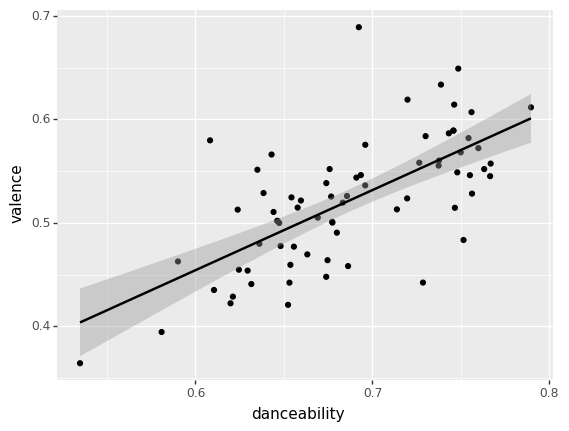

<ggplot: (279226140)>

In [11]:
import plotnine as p9

# creating a scatterplot to see danceability vs valence (perceived happiness of a song)
scatterplot = p9.ggplot(data=df_audio_features,
                     mapping=p9.aes(x='danceability', y='valence', )) + p9.geom_point() + p9.geom_smooth(method='lm')

scatterplot

In [12]:
countries = df_audio_features.index.tolist()
countries

['Argentina',
 'Australia',
 'Austria',
 'Belarus',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Saudi Arabia',
 'Singapore',
 'Slovakia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Turkey',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Venezuela',
 'Vietnam']

In [16]:
# assigning regions to each country so we can have a regional look at the data
regions = ['South America', 
           'Oceania', 
           'Central Europe',
           'Eastern Europe',
           'Western Europe', 
           'South America',
           'South America',
           'Eastern Europe',
           'North America',
           'South America',
           'South America',
           'Central America',
           'Central Europe',
           'Northern Europe', 
           'Central America',
           'South America',
           'Middle East',
           'Central America',
           'Northern Europe', 
           'Northern Europe', 
           'Western Europe',
           'Central Europe',
           'Southern Europe',
           'Central America',
           'Central America',
           'Northeast Asia',
           'Central Europe', 
           'Northern Europe',
           'South Asia',
           'Southeast Asia',
           'Western Europe',
           'Middle East',
           'Southern Europe',
           'Northeast Asia',
           'Eastern Europe',
           'Northern Europe',
           'Northern Europe',
           'Western Europe',
           'Southeast Asia',
           'North America',
           'Africa',
           'Western Europe',
           'Oceania',
           'Central America',
           'Africa',
           'Northern Europe',
           'South Asia',
           'Central America',
           'South America',
           'South America',
           'Southeast Asia',
           'Central Europe',
           'Southern Europe',
           'Eastern Europe',
           'Middle East',
           'Southeast Asia',
           'Central Europe',
           'Africa',
           'Northeast Asia',
           'Southern Europe',
           'Northern Europe',
           'Central Europe',
           'Northeast Asia',
           'Southeast Asia',
           'Southern Europe',
           'Eastern Europe',
           'Middle East',
           'Western Europe',
           'North America',
           'South America',
           'South America',
           'Southeast Asia']
len(regions)



72

In [17]:
countries_and_regions = pd.DataFrame(regions, index = countries,
                                              columns =['region'])

In [18]:
countries_and_regions

,region
Argentina,South America
Australia,Oceania
Austria,Central Europe
Belarus,Eastern Europe
Belgium,Western Europe
...,...
United Kingdom,Western Europe
United States,North America
Uruguay,South America
Venezuela,South America


In [20]:
df_audio_features_with_regions = countries_and_regions.join(df_audio_features)
df_audio_features_with_regions

,region,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Argentina,South America,0.73870,0.66550,-5.24498,0.115564,0.237986,0.003264,0.212630,0.633600,112.97290
Australia,Oceania,0.65956,0.64192,-6.50540,0.082410,0.250339,0.019363,0.163216,0.521600,123.13682
Austria,Central Europe,0.73002,0.69158,-6.51260,0.119706,0.235949,0.012272,0.201260,0.583780,126.87928
Belarus,Eastern Europe,0.64810,0.68016,-6.91520,0.131206,0.178967,0.067352,0.219444,0.477620,135.23300
Belgium,Western Europe,0.65772,0.67340,-6.50024,0.088458,0.227131,0.020708,0.162494,0.514760,123.57646
...,...,...,...,...,...,...,...,...,...,...
United Kingdom,Western Europe,0.65424,0.66520,-6.37802,0.092536,0.237688,0.021773,0.167094,0.524620,123.45104
United States,North America,0.63610,0.62284,-6.76924,0.090490,0.278944,0.010649,0.181414,0.479802,128.33966
Uruguay,South America,0.74848,0.65648,-5.34632,0.127354,0.249608,0.016663,0.162648,0.649060,116.12322
Venezuela,South America,0.76312,0.66604,-5.12824,0.141096,0.259639,0.017289,0.166628,0.551980,121.62506


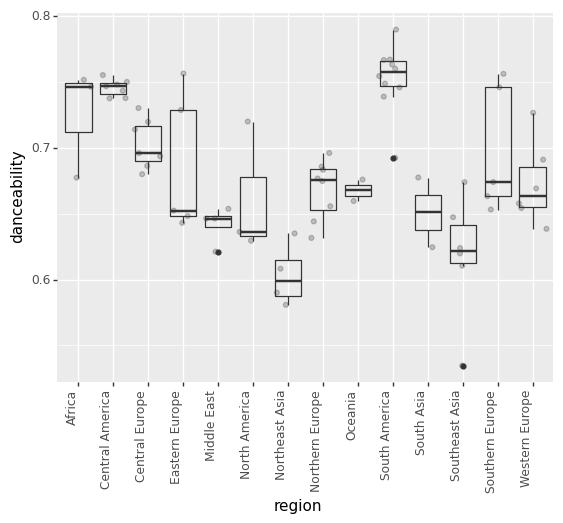

<ggplot: (307431722)>

In [34]:
plot = (p9.ggplot(data=df_audio_features_with_regions,
           mapping=p9.aes(x='region',
                          y='danceability'))
        + p9.geom_jitter(alpha=0.2)
        + p9.geom_boxplot(alpha=0.)
        + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
        )

plot

### Other ideas for further analysis: <br>
- What are the most popular genres in each country? (by getting the genres that each artist in each country's top 50 playlist belongs to) <br>
- Who are the most popular artists in each country? (basically seeing which artists appear in each country's top 50 playlist) <br>
- I can also use the Spotify API to [get the related artists for each of these artists](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-an-artists-related-artists) and then do some network analysis on that.

### Limitations: <br>
Spotify API has a rate limit of about 180 requests per minute [based on a rolling 30 second window](https://developer.spotify.com/documentation/web-api/guides/rate-limits/).